# Análise de Risco de Crédito - NuBank

Risco de crédito está associado à possibilidade de um cliente não cumprir com as obrigações contratuais, como hipotecas, dívidas de cartão de crédito e outros tipos de empréstimos.

Minimizar o risco de inadimplência é uma grande preocupação para instituições financeiras. Por esse motivo, bancos comerciais e de investimento, fundos de capital de risco, empresas de gestão de ativos e seguradoras, para citar alguns, estão cada vez mais contando com a tecnologia para prever quais clientes são mais propensos a não honrar com as suas dívidas.

Modelos de Machine Learning têm ajudado essas empresas a melhorar a precisão de suas análises de risco de crédito, fornecendo um método científico para identificar devedores em potencial com antecedência.

Neste projeto, construiremos um modelo para prever o risco de inadimplência do cliente para o Nubank, uma das maiores e importantes Fintechs brasileira.

## Importação das Bibliotecas

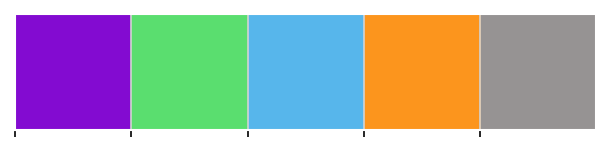

In [1]:
# import dos pacotes
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# definição do estilo estético das plotagens
sns.set_style()

# filtragem de warnings
import warnings
warnings.filterwarnings('ignore')   

from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split

# Set the option to display all columns
pd.set_option('display.max_columns', None)

# Visualization Settings
mpl.style.use('ggplot')
mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['grid.color']          = 'lightgray'
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['axes.grid']           = True
mpl.rcParams['figure.dpi']          = 150

# Palette Seting
instyle_palette = ['#830BD1', '#5ADE6F', '#57B6EB', '#FC951D', '#969393']
sns.set_palette(sns.color_palette(instyle_palette))
sns.palplot(sns.color_palette(instyle_palette))



## Importação do Dataset

In [2]:
df = pd.read_csv('data/acquisition_train.csv')

## Visualização e Entendimento dos Dados

In [3]:
df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,NaN,3,NaN,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,13:39:03,240,gmail.com,0.0,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


In [4]:
# Dataframe shape
print('Número de linhas do dataset: ', df.shape[0])
print('Número de colunas do dataset: ', df.shape[1])

Número de linhas do dataset:  45000
Número de colunas do dataset:  43


In [5]:
# Informações sobre o dataset	
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   ids                                               45000 non-null  object 
 1   target_default                                    41741 non-null  object 
 2   score_1                                           44438 non-null  object 
 3   score_2                                           44438 non-null  object 
 4   score_3                                           44438 non-null  float64
 5   score_4                                           45000 non-null  float64
 6   score_5                                           45000 non-null  float64
 7   score_6                                           45000 non-null  float64
 8   risk_rate                                         44438 non-null  float64
 9   last_amount_borro

- Podemos ver que algumas variáveis possuem valores ausentes. Vamos dar uma olhada mais de perto nelas.

In [6]:
# Porcentagem de valores faltantes
print(((df.isnull().sum() / df.shape[0]) * 100).sort_values(ascending=False))

target_fraud                                        96.617778
last_amount_borrowed                                66.568889
last_borrowed_in_months                             66.568889
ok_since                                            58.988889
external_data_provider_credit_checks_last_2_year    50.284444
external_data_provider_credit_checks_last_year      33.608889
credit_limit                                        30.666667
n_issues                                            25.653333
facebook_profile                                     9.906667
marketing_channel                                    7.951111
job_name                                             7.413333
target_default                                       7.242222
external_data_provider_email_seen_before             4.962222
lat_lon                                              3.028889
user_agent                                           1.604444
n_bankruptcies                                       1.548889
n_defaul

- Verificar as estatísticas descritivas das variáveis numéricas.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
score_3,44438.0,3.479833e+02,110.429165,0.000000,270.000000,340.000000,420.000000,9.900000e+02
score_4,45000.0,1.000068e+02,3.178080,86.191572,97.867036,100.018900,102.141797,1.139782e+02
score_5,45000.0,5.000371e-01,0.288326,0.000035,0.252150,0.500753,0.748816,9.999734e-01
score_6,45000.0,9.992523e+01,10.016549,60.663039,93.198353,99.974796,106.640275,1.421924e+02
risk_rate,44438.0,2.967172e-01,0.101933,0.000000,0.220000,0.290000,0.360000,9.000000e-01
last_amount_borrowed,15044.0,1.378234e+04,8077.571933,1005.180000,7519.502500,12023.465000,19220.270000,3.505960e+04
last_borrowed_in_months,15044.0,4.176389e+01,10.252705,36.000000,36.000000,36.000000,36.000000,6.000000e+01
credit_limit,31200.0,3.438195e+04,36586.982218,0.000000,10000.000000,25647.000000,47086.750000,4.482690e+05
income,44438.0,7.160739e+04,51858.967748,4821.180000,45010.777500,61266.760000,86019.232500,5.000028e+06
ok_since,18455.0,3.506974e+01,21.663194,0.000000,17.000000,32.000000,50.000000,1.410000e+02


## Relatório Análise Inicial dos Dados

- O dataset possui **43** variáveis e **45.000** registros.
- Dessas **43** variáveis, **8** possuem mais de **10%** de valores missing, **target_fraud** é a variável com a maior porcentagem de valores ausentes **(96.6%)**, em segundo e terceiro lugar temos as variáveis **last_amount_borrowed** e **last_borrowed_in_months** com **(66.5%)** de valores ausentes.
- A variável **target_fraud** mostra se existe ou não fraude de cartão de crédito. Nesse caso essa variável não é importante para o projeto.Portanto, esta coluna será excluída.
- As variáveis **last_amount_borrowed**, **last_borrowed_in_months**, **ok_since** e **external_data_provider_credit_checks_last_2_year** possuem mais de 50% de valores ausentes, substituir esses valores é algo difícil, manter elas pode gerar erros durante a predição. Portanto, estas colunas serão excluídas.
- As variáveis **job_name**, **external_data_provider_first_name**, **profile_phone_number** e **zip** são variáveis insignificantes para o projeto, portanto serão excluídas.
- A variável **external_data_provider_email_seen_before** possui um valor mínimo de -999.000000, certamente foi um erro, nesse caso, vamos alterar para o tipo NaN.
- A variável **reported_income** possui um valor máximo descrito como inf(infinito), nesse caso, vamos alterar para o tipo NaN.
- A variável **credit_limit** possui um valor mínimo de 0.000000, isso não existe em instituições financeiras, é obrigatório liberar um valor X de crédito para o cliente. Portanto, este valor será substituído por NaN.
- As variáveis:
    - **ids**, **score_1**, **score_2**, **reason**, **facebook_profile**, **state**, **zip**, **channel**, **job_name**, **real_state**,
**email**, **external_data_provider_first_name**, **lat_lon**, **marketing_channel**, **external_data_provider_email_seen_before**,
**application_time_in_funnel**, **profile_phone_number**, **shipping_zip_code**, **profile_tags**, **user_agent**, e **target_fraud** são variáveis com valores não significantes para o projeto, portanto serão excluídas.

## Exclusão das Variáveis não significativas

In [8]:
# cópia do dataframe
df2 = df.copy()

In [9]:
exclude_columns = ["ids", "score_1", "score_2", "reason", "facebook_profile", "state", "zip", "channel", "job_name", "real_state",
                    "email", "external_data_provider_first_name", "external_data_provider_email_seen_before","lat_lon", "marketing_channel", 
                    "profile_phone_number", "application_time_in_funnel","shipping_zip_code", "profile_tags", "user_agent", "target_fraud"]

df2.drop(labels = exclude_columns, axis=1, inplace=True)

## Alteração da Variável credit_limit com valor 0

In [10]:
df2['credit_limit'] = df2['credit_limit'].apply(lambda x: np.nan if x == 0 else x)

## Alteração da Variável reported_income com Valor Inf

In [11]:
df2.replace([np.inf, -np.inf], np.nan, inplace=True)

## Divisão dos dados em treino e teste

- Antes de iniciar as transformações e pré-processamentos dos dados, é necessário dividir o dataset em treino e teste, mas porque?
    - Porque precisamos evitar o "Data Leakage". Data Leakage ocorre quando informações do conjunto de dados de teste ou validação vazam para o conjunto de treinamento durante o pré-processamento ou modelagem, ou quando informaçõpes do target vazam para as features. Nessas situações, o que vai acontecer é que você vai ver um modelo muito bom, mas isso será ilusório, pois o seu modelo "roubou" para ter o resultado bom.

- Referências sobre Data Leakage: 
    - https://www.linkedin.com/company/universidade-dos-dados/posts/?feedView=all
    - https://www.casadocodigo.com.br/products/livro-escd
    - https://estatsite.com.br/2020/12/12/data-leakage-o-erro-que-ate-os-grandes-cometem/


In [12]:
# Dividindo os dados primeiro

X = df2.drop(columns=['target_default'])	
y = df2['target_default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
train = pd.concat([X_train, y_train], axis=1)
train.reset_index(drop=True, inplace=True)
train.head()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_fraud_score,reported_income,shipping_state,target_default
0,240.0,105.331178,0.893486,94.495216,0.26,NaN,NaN,21968.0,45013.96,NaN,1.0,0.0,11.0,11.0,19:41:46,0.0,2,NaN,741,92586.0,BR-ES,False
1,270.0,103.211042,0.605574,101.567582,0.33,19237.32,36.0,40972.0,80022.23,NaN,0.0,0.0,12.0,12.0,05:04:32,0.0,3,1.0,659,95975.0,BR-GO,False
2,260.0,102.557916,0.917576,117.057610,0.28,NaN,NaN,NaN,19225.52,NaN,0.0,0.0,7.0,NaN,20:20:48,NaN,1,NaN,905,53981.0,BR-PR,False
3,300.0,101.664122,0.627588,89.140113,0.28,NaN,NaN,NaN,60043.78,62.0,NaN,0.0,9.0,NaN,03:43:14,0.0,2,NaN,603,140976.0,BR-DF,False
4,350.0,109.603725,0.657344,98.574923,0.27,NaN,NaN,156549.0,45032.90,45.0,0.0,0.0,25.0,25.0,09:09:36,NaN,3,NaN,911,120129.0,BR-SP,False


## Input Missing

In [14]:
train_num_columns = train.select_dtypes(exclude='object').columns
train_cat_columns = train.select_dtypes(include='object').columns

In [15]:
# Input Missing Variáveis Numéricas

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(train.loc[:, train_num_columns])
train.loc[:, train_num_columns] = imputer.transform(train.loc[:, train_num_columns])

# Input Missing Variáveis Categóricas

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(train.loc[:, train_cat_columns])
train.loc[:, train_cat_columns] = imputer.transform(train.loc[:, train_cat_columns])


In [16]:
train.isna().sum()

score_3                                             0
score_4                                             0
score_5                                             0
score_6                                             0
risk_rate                                           0
last_amount_borrowed                                0
last_borrowed_in_months                             0
credit_limit                                        0
income                                              0
ok_since                                            0
n_bankruptcies                                      0
n_defaulted_loans                                   0
n_accounts                                          0
n_issues                                            0
application_time_applied                            0
external_data_provider_credit_checks_last_2_year    0
external_data_provider_credit_checks_last_month     0
external_data_provider_credit_checks_last_year      0
external_data_provider_fraud

### Exportar Dataset Limpo

In [17]:
train.to_csv('data/train.csv', index=False)

### Separação das Variáveis Numéricas e Categóricas

In [18]:
train_numerical = train.select_dtypes(exclude='object')
train_categorical = train.select_dtypes(include='object')

### Verificação de Outliers

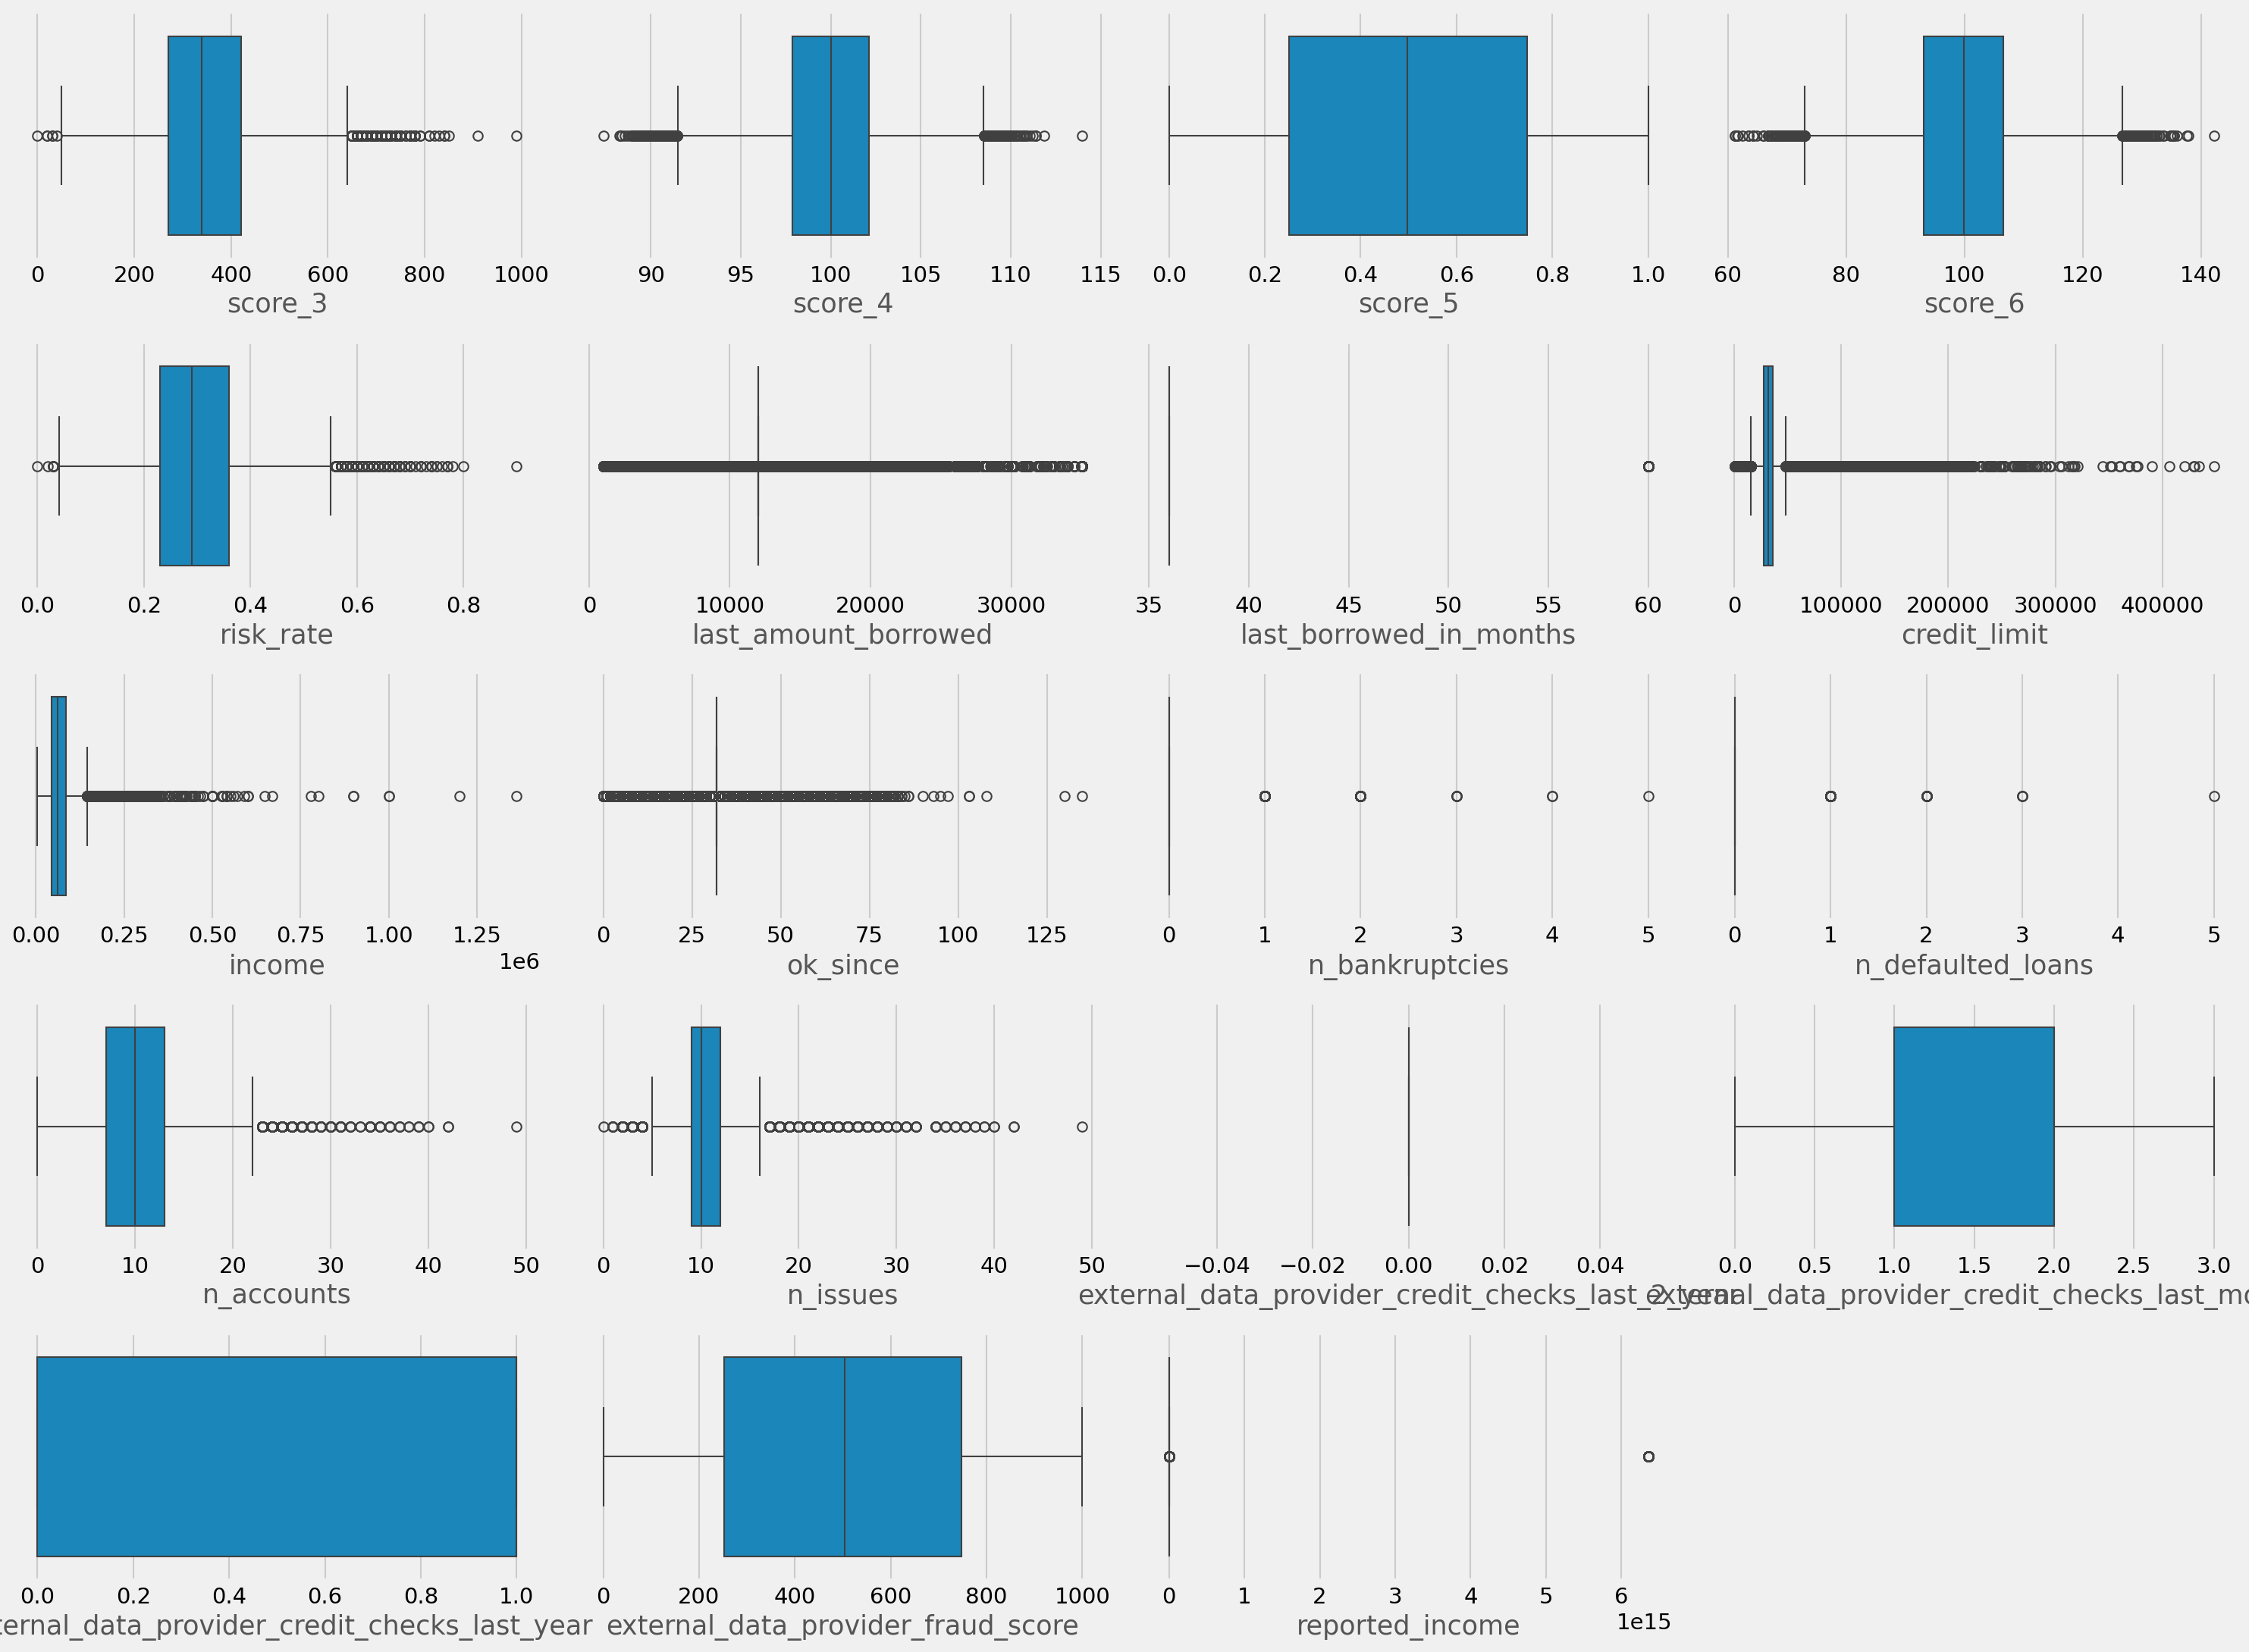

In [19]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(20,20))
for index,column in enumerate(train_numerical):
    plt.subplot(7,4,index+1)
    sns.boxplot(data=train_numerical,x=column)
    
plt.tight_layout(pad = 1.0)

## Análise Exploratória de Dados

### Análise Bivariada

**Target Default**

Target default no contexto de credit risk (risco de crédito) refere-se à definição de inadimplência que é usada como a variável alvo (target) em modelos de previsão de risco de crédito. Essa variável indica se um cliente (pessoa física ou jurídica) cumpriu ou não suas obrigações financeiras, como pagamentos de empréstimos ou financiamentos.

**Score**

O score de crédito é geralmente calculado com base em modelos estatísticos que analisam o histórico financeiro de uma pessoa ou empresa. Esses modelos consideram uma variedade de informações, incluindo:

- Histórico de pagamento: Frequência com que você paga suas contas no prazo.
- Dívidas em aberto: Valor e número de dívidas existentes.
- Uso do crédito: Proporção de crédito usado em relação ao limite disponível (chamado de "taxa de utilização").
- Tempo de crédito: Quantidade de tempo que você possui histórico financeiro.
- Consultas de crédito: Quantas vezes seu relatório de crédito foi consultado recentemente.
- Registros negativos: Presença de atrasos, inadimplências, protestos ou ações judiciais.

O score de crédito é tipicamente representado por um número dentro de um intervalo, como:
- 300 a 850 (nos EUA, em modelos como FICO ou VantageScore)
- 0 a 1.000 (no Brasil, por birôs como Serasa, Boa Vista ou SPC)

O score brasileiro é geralmente dividido em faixas:

- Baixo (0-300): Alto risco de inadimplência.
- Médio (301-700): Risco moderado.
- Alto (701-1000): Baixo risco de inadimplência.

In [24]:
fig = px.box(train, y="score_3")
fig.show()

In [389]:
train.score_3.value_counts().sort_values(ascending=False).head()

score_3
340.0    1595
350.0    1231
330.0    1204
310.0    1197
300.0    1194
Name: count, dtype: int64

In [287]:
train.score_4.value_counts().sort_index(ascending=False).head()

score_4
113.978234    1
111.838188    1
111.380993    1
111.374577    1
111.205730    1
Name: count, dtype: int64

In [288]:
train.score_5.value_counts().sort_index(ascending=False).head()

score_5
0.999914    1
0.999879    1
0.999845    1
0.999789    1
0.999775    1
Name: count, dtype: int64

In [289]:
train.score_6.value_counts().sort_index(ascending=False).head()

score_6
142.192400    1
137.827380    1
137.599086    1
135.965638    1
135.444739    1
Name: count, dtype: int64

- Entre os Scores vou utilizar o score_3 por ser mais robusto para comparação com outras variáveis.

**Risk Rate**

O termo "risk rate" (taxa de risco) se refere à probabilidade ou ao nível de risco associado a uma determinada situação, investimento, crédito ou evento. Dependendo do contexto, pode ser calculado de diferentes maneiras, mas, em geral, o "risk rate" indica o grau de risco envolvido e pode influenciar decisões financeiras, políticas ou operacionais.

In [290]:
train.risk_rate.value_counts().sort_values(ascending=False).head()

risk_rate
0.29    1717
0.26    1351
0.28    1350
0.30    1322
0.27    1308
Name: count, dtype: int64

In [291]:
train.head()


,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_fraud_score,reported_income,shipping_state,target_default
0,240.0,105.331178,0.893486,94.495216,0.26,12024.02,36.0,21968.0,45013.96,32.0,1.0,0.0,11.0,11.0,19:41:46,0.0,2,1.0,741,92586.0,BR-ES,False
1,270.0,103.211042,0.605574,101.567582,0.33,19237.32,36.0,40972.0,80022.23,32.0,0.0,0.0,12.0,12.0,05:04:32,0.0,3,1.0,659,95975.0,BR-GO,False
2,260.0,102.557916,0.917576,117.057610,0.28,12024.02,36.0,31510.0,19225.52,32.0,0.0,0.0,7.0,10.0,20:20:48,0.0,1,1.0,905,53981.0,BR-PR,False
3,300.0,101.664122,0.627588,89.140113,0.28,12024.02,36.0,31510.0,60043.78,62.0,0.0,0.0,9.0,10.0,03:43:14,0.0,2,1.0,603,140976.0,BR-DF,False
4,350.0,109.603725,0.657344,98.574923,0.27,12024.02,36.0,156549.0,45032.90,45.0,0.0,0.0,25.0,25.0,09:09:36,0.0,3,1.0,911,120129.0,BR-SP,False
